In [1]:
# import data
import pandas as pd

bio = pd.read_excel("biomarkers.xlsx")
cov = pd.read_excel("covariates.xlsx", sheet_name='Ark1')

In [2]:
# Display the loaded data
print(bio)

        Biomarker  IL-8  VEGF-A    OPG  TGF-beta-1  IL-6  CXCL9  CXCL1  IL-18  \
0      126-0weeks  7.63   11.51  10.20        8.83  3.52   6.16   9.45   7.91   
1      126-6weeks  7.12   11.59  10.41        8.87  3.89   6.12   9.06   7.92   
2      127-0weeks  6.93   10.92  10.30        6.59  2.73   6.14   7.31   7.95   
3      127-6weeks  7.16   11.58  10.39        8.61  2.60   6.35   8.61   7.94   
4    127-12months  6.87   11.13  10.25        7.44  3.92   6.15   8.79   7.94   
..            ...   ...     ...    ...         ...   ...    ...    ...    ...   
342    121-6weeks  7.21   12.89  10.69        8.90  3.14   5.97   8.00   8.17   
343  121-12months  6.35   11.01   9.96        6.70  2.55   4.68   7.34   7.76   
344    122-0weeks  7.86   12.80  10.73        9.30  2.93   6.73   9.60   8.25   
345    122-6weeks  8.52   13.04  10.81        8.79  2.94   6.73   9.64   8.19   
346    124-0weeks  6.51   11.38  10.07        7.78  3.29   5.97   7.17   8.68   

     CSF-1  
0     8.41  
1

In [3]:
# Display the loaded data
print(cov)

     PatientID  Age  Sex (1=male, 2=female)  Smoker (1=yes, 2=no)  \
0            1   56                       1                     2   
1            3   32                       1                     2   
2            4   43                       2                     2   
3            5   25                       2                     2   
4            6   39                       1                     2   
..         ...  ...                     ...                   ...   
113        143   55                       1                     1   
114        149   46                       2                     2   
115        150   57                       1                     1   
116        151   25                       2                     2   
117        152   53                       1                     2   

     VAS-at-inclusion  Vas-12months  
0                 3.0           4.0  
1                 7.2           0.5  
2                 2.7           0.5  
3                 3

# Merge data from both files based on ID

In [4]:
# Extract only the values at-inclusion in the bio
filtered_bio = bio[bio['Biomarker'].str.endswith('0weeks')]
# Count the number of rows
rows = filtered_bio.shape[0]
print(f'rows: {rows}')

rows: 117


In [5]:
# Extract ID numbers from filtered_bio
filtered_bio['PatientID'] = filtered_bio['Biomarker'].apply(lambda x: x.split('-')[0])
print(filtered_bio)

      Biomarker  IL-8  VEGF-A    OPG  TGF-beta-1  IL-6  CXCL9  CXCL1  IL-18  \
0    126-0weeks  7.63   11.51  10.20        8.83  3.52   6.16   9.45   7.91   
2    127-0weeks  6.93   10.92  10.30        6.59  2.73   6.14   7.31   7.95   
5    128-0weeks  8.62   12.51  10.56        8.51  3.71   7.34   9.90   8.72   
8    129-0weeks  8.16   11.16  10.61        8.76  3.85   5.81   9.18   7.49   
11   130-0weeks  8.81   12.53  11.23        9.41  4.22   6.35   9.34   9.00   
..          ...   ...     ...    ...         ...   ...    ...    ...    ...   
336  118-0weeks  7.81   12.05  10.35        7.91  4.10   6.66   7.66   9.37   
338  119-0weeks  8.18   11.97  10.75        9.39  3.05   7.03   9.33   8.64   
341  121-0weeks  7.01   12.53  10.91        8.74  3.08   5.95   7.61   8.27   
344  122-0weeks  7.86   12.80  10.73        9.30  2.93   6.73   9.60   8.25   
346  124-0weeks  6.51   11.38  10.07        7.78  3.29   5.97   7.17   8.68   

     CSF-1 PatientID  
0     8.41       126  
2    

C:\Users\tanihara\AppData\Local\Temp\ipykernel_18556\2528645147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_bio['PatientID'] = filtered_bio['Biomarker'].apply(lambda x: x.split('-')[0])


In [6]:
# Convert the ID columns of filtered_bio and cov to integer type
filtered_bio['PatientID'] = filtered_bio['PatientID'].astype(int)
cov['PatientID'] = cov['PatientID'].astype(int)

C:\Users\tanihara\AppData\Local\Temp\ipykernel_18556\2576291518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_bio['PatientID'] = filtered_bio['PatientID'].astype(int)


In [7]:
# Merge filtered_bio and cov based on ID
merged_df = pd.merge(filtered_bio, cov, on='PatientID', how='inner')
print(merged_df)

      Biomarker  IL-8  VEGF-A    OPG  TGF-beta-1  IL-6  CXCL9  CXCL1  IL-18  \
0    126-0weeks  7.63   11.51  10.20        8.83  3.52   6.16   9.45   7.91   
1    127-0weeks  6.93   10.92  10.30        6.59  2.73   6.14   7.31   7.95   
2    128-0weeks  8.62   12.51  10.56        8.51  3.71   7.34   9.90   8.72   
3    129-0weeks  8.16   11.16  10.61        8.76  3.85   5.81   9.18   7.49   
4    130-0weeks  8.81   12.53  11.23        9.41  4.22   6.35   9.34   9.00   
..          ...   ...     ...    ...         ...   ...    ...    ...    ...   
112  118-0weeks  7.81   12.05  10.35        7.91  4.10   6.66   7.66   9.37   
113  119-0weeks  8.18   11.97  10.75        9.39  3.05   7.03   9.33   8.64   
114  121-0weeks  7.01   12.53  10.91        8.74  3.08   5.95   7.61   8.27   
115  122-0weeks  7.86   12.80  10.73        9.30  2.93   6.73   9.60   8.25   
116  124-0weeks  6.51   11.38  10.07        7.78  3.29   5.97   7.17   8.68   

     CSF-1  PatientID  Age  Sex (1=male, 2=female) 

# Check the distribution of each biomarker

In [8]:
# List of biomarker column names (excluding unnecessary columns)
protein_columns = ['IL-8', 'VEGF-A', 'OPG', 'TGF-beta-1', 'IL-6', 'CXCL9', 'CXCL1', 'IL-18', 'CSF-1'] 
# Create a DataFrame that includes only the columns of biomarkers
df_proteins = merged_df[protein_columns]

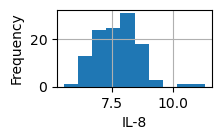

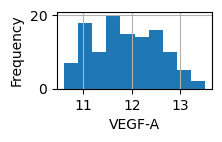

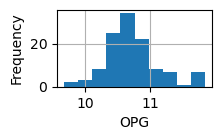

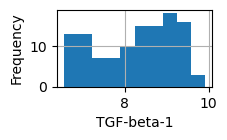

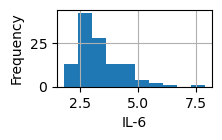

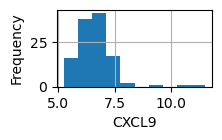

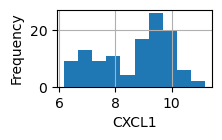

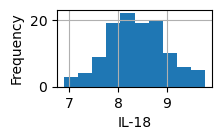

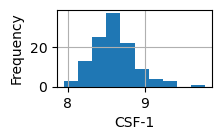

In [9]:
import matplotlib.pyplot as plt
# Create histograms for each biomarker column
for column in df_proteins.columns:
    plt.figure(figsize=(2, 1))  
    df_proteins[column].hist(bins=10) 
    plt.xlabel(column) 
    plt.ylabel('Frequency') 
       
    
    plt.show

In [14]:
import scipy.stats as stats

# Perform the Shapiro-Wilk test for each biomarker
for column in df_proteins.columns:
    stat, p = stats.shapiro(df_proteins[column])
    print(f'{column}: Statistics={stat:.3f}, p-value={p:.3f}')
    
   
    if p > 0.05:
        print(f"  -> The distribution of {column} can be considered as normally distributed (significance level 0.05).\n")
    else:
        print(f"  -> The distribution of {column} may deviate from a normal distribution (significance level 0.05).\n")

IL-8: Statistics=0.968, p-value=0.007
  -> The distribution of IL-8 may deviate from a normal distribution (significance level 0.05).

VEGF-A: Statistics=0.978, p-value=0.054
  -> The distribution of VEGF-A can be considered as normally distributed (significance level 0.05).

OPG: Statistics=0.953, p-value=0.000
  -> The distribution of OPG may deviate from a normal distribution (significance level 0.05).

TGF-beta-1: Statistics=0.937, p-value=0.000
  -> The distribution of TGF-beta-1 may deviate from a normal distribution (significance level 0.05).

IL-6: Statistics=0.894, p-value=0.000
  -> The distribution of IL-6 may deviate from a normal distribution (significance level 0.05).

CXCL9: Statistics=0.816, p-value=0.000
  -> The distribution of CXCL9 may deviate from a normal distribution (significance level 0.05).

IL-18: Statistics=0.992, p-value=0.711
  -> The distribution of IL-18 can be considered as normally distributed (significance level 0.05).

CSF-1: Statistics=0.963, p-valu

#　t-test

In [14]:
from scipy import stats
# Compare the mean values of IL-8 between groups with VAS-at-inclusion of 5 or more and less than 5
# Group with VAS-at-inclusion of 5 or more
IL_1 = merged_df[merged_df['VAS-at-inclusion'] >= 5]['IL-8']
# Group with VAS-at-inclusion of less than 5
IL_2 = merged_df[merged_df['VAS-at-inclusion'] < 5]['IL-8']

# Calculate the average value for each group.
mean_IL_1 = IL_1.mean()
mean_IL_2 = IL_2.mean()

# Conduct a t-test between the two groups.
t_stat, p_value = stats.ttest_ind(IL_1, IL_2, equal_var=False)  # 等分散を仮定しない

print(f'The average IL-8 value for the group with VAS-at-inclusion of 5 or more: {mean_IL_1}')
print(f'The average IL-8 value for the group with VAS-at-inclusion less than 5: {mean_IL_2}')
print(f't-value: {t_stat}, p-value: {p_value}')

The average IL-8 value for the group with VAS-at-inclusion of 5 or more: 7.8835
The average IL-8 value for the group with VAS-at-inclusion less than 5: 7.363513513513515
t-value: 3.312786502552862, p-value: 0.0013491064032483653


In [15]:
# Compare the mean values of VEGF-A between groups with VAS-at-inclusion of 5 or more and less than 5

VEGF_1 = merged_df[merged_df['VAS-at-inclusion'] >= 5]['VEGF-A']
VEGF_2 = merged_df[merged_df['VAS-at-inclusion'] < 5]['VEGF-A']

mean_VEGF_1 = VEGF_1.mean()
mean_VEGF_2 = VEGF_2.mean()

t_stat, p_value = stats.ttest_ind(VEGF_1, VEGF_2, equal_var=False)  # 等分散を仮定しない

print(f'The average VEGF-A value for the group with VAS-at-inclusion of 5 or more: {mean_VEGF_1}')
print(f'The average VEGF-A value for the group with VAS-at-inclusion less than 5: {mean_VEGF_2}')
print(f't-value: {t_stat}, p-value: {p_value}')

The average VEGF-A value for the group with VAS-at-inclusion of 5 or more: 11.937125
The average VEGF-A value for the group with VAS-at-inclusion less than 5: 11.741891891891893
t-value: 1.4162958205244889, p-value: 0.1615676552404966


In [18]:
# Compare the mean values of OPG between groups with VAS-at-inclusion of 5 or more and less than 5

OPG_1 = merged_df[merged_df['VAS-at-inclusion'] >= 5]['OPG']
OPG_2 = merged_df[merged_df['VAS-at-inclusion'] < 5]['OPG']

mean_OPG_1 = OPG_1.mean()
mean_OPG_2 = OPG_2.mean()

t_stat, p_value = stats.ttest_ind(OPG_1, OPG_2, equal_var=False)

print(f'The average OPG value for the group with VAS-at-inclusion of 5 or more: {mean_OPG_1}')
print(f'The average OPG value for the group with VAS-at-inclusion less than 5: {mean_OPG_2}')
print(f't-value: {t_stat}, p-value: {p_value}')

The average OPG value for the group with VAS-at-inclusion of 5 or more: 10.738125
The average OPG value for the group with VAS-at-inclusion less than 5: 10.70864864864865
t-value: 0.3702605484212078, p-value: 0.7121552178537096


In [19]:
# Compare the mean values of TGF-beta-1 between groups with VAS-at-inclusion of 5 or more and less than 5

TGF_1 = merged_df[merged_df['VAS-at-inclusion'] >= 5]['TGF-beta-1']
TGF_2 = merged_df[merged_df['VAS-at-inclusion'] < 5]['TGF-beta-1']

mean_TGF_1 = TGF_1.mean()
mean_TGF_2 = TGF_2.mean()

t_stat, p_value = stats.ttest_ind(TGF_1, TGF_2, equal_var=False) 

print(f'The average TGF value for the group with VAS-at-inclusion of 5 or more: {mean_TGF_1}')
print(f'The average TGF value for the group with VAS-at-inclusion less than 5: {mean_TGF_2}')
print(f't-value: {t_stat}, p-value: {p_value}')

The average TGF value for the group with VAS-at-inclusion of 5 or more: 8.362
The average TGF value for the group with VAS-at-inclusion less than 5: 7.985945945945945
t-value: 2.0562165377385266, p-value: 0.0434586036015222


In [20]:
# Compare the mean values of IL-6 between groups with VAS-at-inclusion of 5 or more and less than 5

IL6_1 = merged_df[merged_df['VAS-at-inclusion'] >= 5]['IL-6']
IL6_2 = merged_df[merged_df['VAS-at-inclusion'] < 5]['IL-6']

mean_IL6_1 = IL6_1.mean()
mean_IL6_2 = IL6_2.mean()

t_stat, p_value = stats.ttest_ind(IL6_1, IL6_2, equal_var=False) 

print(f'The average IL-6 value for the group with VAS-at-inclusion of 5 or more: {mean_IL6_1}')
print(f'The average IL-6 value for the group with VAS-at-inclusion less than 5: {mean_IL6_2}')
print(f't-value: {t_stat}, p-value: {p_value}')

The average IL-6 value for the group with VAS-at-inclusion of 5 or more: 3.3146250000000004
The average IL-6 value for the group with VAS-at-inclusion less than 5: 3.378378378378379
t-value: -0.3208141040238915, p-value: 0.7493107266648378


In [21]:
# Compare the mean values of CXCL9 between groups with VAS-at-inclusion of 5 or more and less than 5

CXCL9_1 = merged_df[merged_df['VAS-at-inclusion'] >= 5]['CXCL9']
CXCL9_2 = merged_df[merged_df['VAS-at-inclusion'] < 5]['CXCL9']

mean_CXCL9_1 = CXCL9_1.mean()
mean_CXCL9_2 = CXCL9_2.mean()

t_stat, p_value = stats.ttest_ind(CXCL9_1, CXCL9_2, equal_var=False)

print(f'The average CXCL9 value for the group with VAS-at-inclusion of 5 or more: {mean_CXCL9_1}')
print(f'The average CXCL9 value for the group with VAS-at-inclusion less than 5: {mean_CXCL9_2}')
print(f't-value: {t_stat}, p-value: {p_value}')

The average CXCL9 value for the group with VAS-at-inclusion of 5 or more: 6.676375000000002
The average CXCL9 value for the group with VAS-at-inclusion less than 5: 6.513513513513513
t-value: 1.009187455548421, p-value: 0.31557012785119665


In [22]:
# Compare the mean values of CXCL1 between groups with VAS-at-inclusion of 5 or more and less than 5

CXCL1_1 = merged_df[merged_df['VAS-at-inclusion'] >= 5]['CXCL1']
CXCL1_2 = merged_df[merged_df['VAS-at-inclusion'] < 5]['CXCL1']

mean_CXCL1_1 = CXCL1_1.mean()
mean_CXCL1_2 = CXCL1_2.mean()

t_stat, p_value = stats.ttest_ind(CXCL1_1, CXCL1_2, equal_var=False) 

print(f'The average CXCL1 value for the group with VAS-at-inclusion of 5 or more: {mean_CXCL1_1}')
print(f'The average CXCL1 value for the group with VAS-at-inclusion less than 5: {mean_CXCL1_2}')
print(f't-value: {t_stat}, p-value: {p_value}')

The average CXCL1 value for the group with VAS-at-inclusion of 5 or more: 8.831375
The average CXCL1 value for the group with VAS-at-inclusion less than 5: 8.325405405405407
t-value: 2.1171598619452214, p-value: 0.03769376252714301


In [23]:
# Compare the mean values of IL-18 between groups with VAS-at-inclusion of 5 or more and less than 5

IL18_1 = merged_df[merged_df['VAS-at-inclusion'] >= 5]['IL-18']
IL18_2 = merged_df[merged_df['VAS-at-inclusion'] < 5]['IL-18']

mean_IL18_1 = IL18_1.mean()
mean_IL18_2 = IL18_2.mean()

t_stat, p_value = stats.ttest_ind(IL18_1, IL18_2, equal_var=False)

print(f'The average IL-18 value for the group with VAS-at-inclusion of 5 or more: {mean_IL18_1}')
print(f'The average IL-18 value for the group with VAS-at-inclusion less than 5: {mean_IL18_2}')
print(f't-value: {t_stat}, p-value: {p_value}')

The average IL-18 value for the group with VAS-at-inclusion of 5 or more: 8.437375
The average IL-18 value for the group with VAS-at-inclusion less than 5: 8.226216216216216
t-value: 1.8184930008701419, p-value: 0.07306015400599246


In [24]:
# Compare the mean values of CSF-1 between groups with VAS-at-inclusion of 5 or more and less than 5

CSF_1 = merged_df[merged_df['VAS-at-inclusion'] >= 5]['CSF-1']
CSF_2 = merged_df[merged_df['VAS-at-inclusion'] < 5]['CSF-1']

mean_CSF_1 = CSF_1.mean()
mean_CSF_2 = CSF_2.mean()

t_stat, p_value = stats.ttest_ind(CSF_1, CSF_2, equal_var=False) 

print(f'The average CSF-1 value for the group with VAS-at-inclusion of 5 or more: {mean_CSF_1}')
print(f'The average CSF-1 value for the group with VAS-at-inclusion less than 5: {mean_CSF_2}')
print(f't-value: {t_stat}, p-value: {p_value}')

The average CSF-1 value for the group with VAS-at-inclusion of 5 or more: 8.60925
The average CSF-1 value for the group with VAS-at-inclusion less than 5: 8.576216216216217
t-value: 0.6072830901080019, p-value: 0.5453882655077427


# Mann-Whitney U test

In [17]:
from scipy.stats import mannwhitneyu
# IL-8
# Group with VAS-at-inclusion of 5 or more
IL_1 = merged_df[merged_df['VAS-at-inclusion'] >= 5]['IL-8']
# Group with VAS-at-inclusion of less than 5
IL_2 = merged_df[merged_df['VAS-at-inclusion'] < 5]['IL-8']

# Conduct a Mann-Whitney U test between the two groups.
stat, p = mannwhitneyu(IL_1, IL_2)
print(f'U-statistic={stat:.2f}, p-value={p:.3f}')

U-statistic=2012.00, p-value=0.002


In [18]:
# OPG
OPG_1 = merged_df[merged_df['VAS-at-inclusion'] >= 5]['OPG']
OPG_2 = merged_df[merged_df['VAS-at-inclusion'] < 5]['OPG']

stat, p = mannwhitneyu(OPG_1, OPG_2)
print(f'U-statistic={stat:.2f}, p-value={p:.3f}')

U-statistic=1505.00, p-value=0.886


In [21]:
# TGF-beta-1
TGF_1 = merged_df[merged_df['VAS-at-inclusion'] >= 5]['TGF-beta-1']
TGF_2 = merged_df[merged_df['VAS-at-inclusion'] < 5]['TGF-beta-1']

stat, p = mannwhitneyu(TGF_1, TGF_2)
print(f'U-statistic={stat:.2f}, p-value={p:.3f}')

U-statistic=1821.50, p-value=0.046


In [22]:
# IL-6
IL6_1 = merged_df[merged_df['VAS-at-inclusion'] >= 5]['IL-6']
IL6_2 = merged_df[merged_df['VAS-at-inclusion'] < 5]['IL-6']

stat, p = mannwhitneyu(IL6_1, IL6_2)
print(f'U-statistic={stat:.2f}, p-value={p:.3f}')

U-statistic=1431.00, p-value=0.776


In [23]:
# CXCL9
CXCL9_1 = merged_df[merged_df['VAS-at-inclusion'] >= 5]['CXCL9']
CXCL9_2 = merged_df[merged_df['VAS-at-inclusion'] < 5]['CXCL9']

stat, p = mannwhitneyu(CXCL9_1, CXCL9_2)
print(f'U-statistic={stat:.2f}, p-value={p:.3f}')

U-statistic=1650.00, p-value=0.320


In [24]:
# CXCL1
CXCL1_1 = merged_df[merged_df['VAS-at-inclusion'] >= 5]['CXCL1']
CXCL1_2 = merged_df[merged_df['VAS-at-inclusion'] < 5]['CXCL1']

stat, p = mannwhitneyu(CXCL1_1, CXCL1_2)
print(f'U-statistic={stat:.2f}, p-value={p:.3f}')

U-statistic=1853.00, p-value=0.029


In [25]:
# IL-18
IL18_1 = merged_df[merged_df['VAS-at-inclusion'] >= 5]['IL-18']
IL18_2 = merged_df[merged_df['VAS-at-inclusion'] < 5]['IL-18']

stat, p = mannwhitneyu(IL18_1, IL18_2)
print(f'U-statistic={stat:.2f}, p-value={p:.3f}')

U-statistic=1787.00, p-value=0.072


In [26]:
# CSF-1
CSF1_1 = merged_df[merged_df['VAS-at-inclusion'] >= 5]['CSF-1']
CSF1_2 = merged_df[merged_df['VAS-at-inclusion'] < 5]['CSF-1']

stat, p = mannwhitneyu(CSF1_1, CSF1_2)
print(f'U-statistic={stat:.2f}, p-value={p:.3f}')

U-statistic=1534.50, p-value=0.752
